# pre-processing

In [5]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
file_path = r"titanic_train.csv"
data = pd.read_csv(file_path)
#complete missing age with median
data['Age'].fillna(data['Age'].median(), inplace = True)

#complete missing fare with median
data['Fare'].fillna(data['Fare'].median(), inplace = True)

#complete embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

#complete Cabin with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace = True)

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0

def my_regex(x):
    try:
        num = re.search(r'[0-9]+',x)
        return num.group(0)
    except:
        return 0
    return 

data['Cabin Num'] = data.Cabin.apply(lambda x : my_regex(x))    
#data.head()  

x = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age','Survived']]

y = data.Fare

C:\Users\zigi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Data Exploration

In [95]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

data['new age'] = np.exp(data['Age'])#**(1/2)
column_name = 'Age'

data['new fare'] = np.exp(data['Fare'])#**(1/2)
terget_column_name = 'new fare'

reg = LinearRegression().fit(data[column_name].values.reshape(-1, 1), data[terget_column_name].values.reshape(-1, 1))

print("Linear Regression Score")
print(reg.score(data[column_name].values.reshape(-1, 1), data[terget_column_name].values.reshape(-1, 1)))
print("\n")

print("Linear Regression coefficient")
print(reg.coef_)
print("\n")

print("Linear Regression intercept")
print(reg.intercept_ )
print("\n")


y_pred = reg.predict(data[column_name].values.reshape(-1, 1))

Linear Regression Score
nan


Linear Regression coefficient
[[3.77029803e+218]]


Linear Regression intercept
[-3.79937546e+218]




C:\Users\zigi\Anaconda3\lib\site-packages\scipy\linalg\basic.py:1250: RuntimeWarning: overflow encountered in square
  resids = np.sum(np.abs(x[n:])**2, axis=0)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:546: RuntimeWarning: overflow encountered in square
  y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0,
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:553: RuntimeWarning: invalid value encountered in true_divide
  denominator[valid_score])


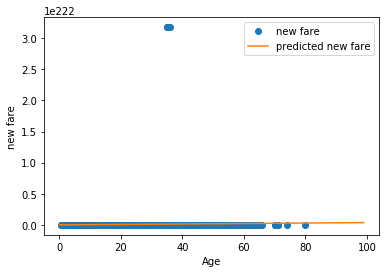

In [96]:
#plot results

x_range = [i for i in range(100)]
y_line_list = list()
for i in x_range:
    y_line = reg.coef_[0]*i + reg.intercept_
    y_line_list.append(y_line)
    

plt.plot(data[column_name],data[terget_column_name],'o')
plt.plot(x_range,y_line_list)
plt.xlabel(column_name)
plt.ylabel(terget_column_name)
plt.legend([terget_column_name,'predicted ' + terget_column_name,'Regression Line'])
plt.show()

C:\Users\zigi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


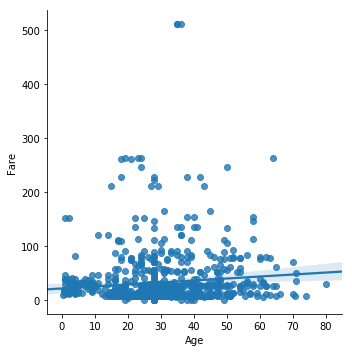

In [97]:
sns.lmplot(x="Age", y="Fare", data=data,ci=99)

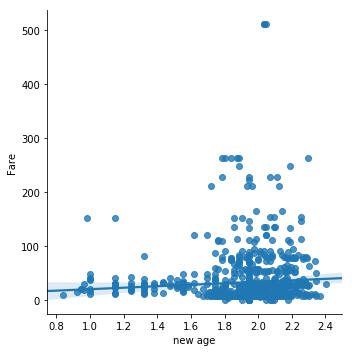

In [98]:
data['new age'] = data['Age']**(1/5)
sns.lmplot(x="new age", y="Fare", data=data,ci=99)#,ci=99

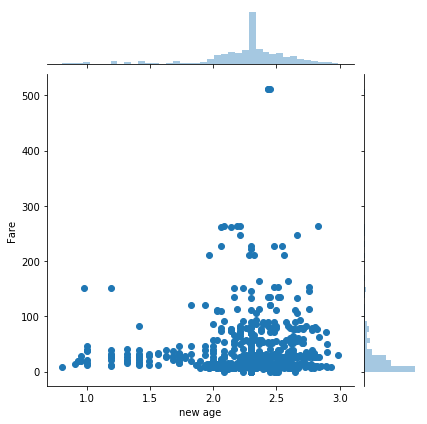

In [42]:
sns.jointplot(x="new age", y="Fare", data=data)

C:\Users\zigi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


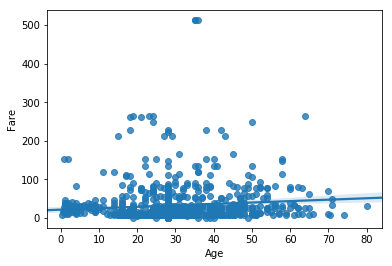

In [59]:
f = plt.figure()
ax = f.add_subplot(1,1,1)
p = sns.regplot(x=data['Age'],y=data['Fare'],data=data,ax=ax)

#p.get_lines()[0].get_xdata()
#p.get_lines()[0].get_ydata()

#p.get_children()[1].get_paths()
p.ge

# Correlation

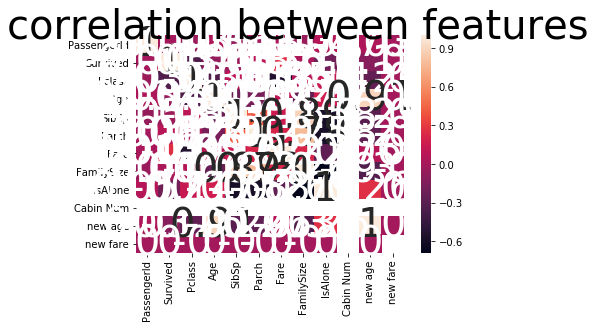

In [100]:
#correlation between features
corr = data.corr()
plt.figure()
sns.heatmap(corr, annot=True, annot_kws={"size": 40})
plt.suptitle("correlation between features", fontsize=40)
plt.show()

Text(0.5, 0.98, 'correlation between label and features')

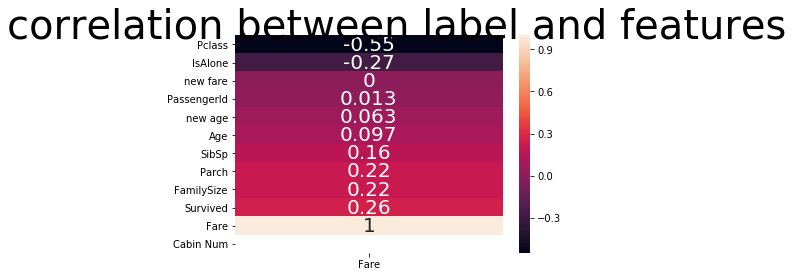

In [103]:
#correlation between label and features
corr_label = data.corr()['Fare'].to_frame()
corr_label.sort_values('Fare',inplace=True)
plt.figure()
sns.heatmap(corr_label, annot=True, annot_kws={"size": 20})
plt.suptitle("correlation between label and features", fontsize=40)

In [128]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so_filter = so[so>0.5]

column_set = set()
for i,j in so_filter.index:
    column_set.add(i)
    column_set.add(j)


#print(column_set)
print(so.sort_values(ascending=False))

PassengerId  PassengerId    1.000000
Parch        Parch          1.000000
Pclass       Pclass         1.000000
Age          Age            1.000000
Survived     Survived       1.000000
SibSp        SibSp          1.000000
new age      new age        1.000000
IsAlone      IsAlone        1.000000
Fare         Fare           1.000000
FamilySize   FamilySize     1.000000
new age      Age            0.907225
Age          new age        0.907225
SibSp        FamilySize     0.890712
FamilySize   SibSp          0.890712
Parch        FamilySize     0.783111
FamilySize   Parch          0.783111
             IsAlone        0.690922
IsAlone      FamilySize     0.690922
SibSp        IsAlone        0.584471
IsAlone      SibSp          0.584471
             Parch          0.583398
Parch        IsAlone        0.583398
Fare         Pclass         0.549500
Pclass       Fare           0.549500
SibSp        Parch          0.414838
Parch        SibSp          0.414838
Age          Pclass         0.339898
P

In [129]:
print(so['Cabin Num'].sort_values(ascending=False))

PassengerId   NaN
Survived      NaN
Pclass        NaN
Age           NaN
SibSp         NaN
Parch         NaN
Fare          NaN
FamilySize    NaN
IsAlone       NaN
Cabin Num     NaN
new age       NaN
new fare      NaN
dtype: float64


In [132]:
data['Cabin Num'].unique()

array([0], dtype=int64)

# Feature Engineering

In [135]:
print(so['FamilySize'].sort_values(ascending=False))

FamilySize     1.000000
SibSp          0.890712
Parch          0.783111
IsAlone        0.690922
new age        0.333748
Age            0.245619
Fare           0.217138
Pclass         0.065997
PassengerId    0.040143
Survived       0.016639
new fare       0.000000
Cabin Num           NaN
dtype: float64


In [138]:
data[['FamilySize','SibSp']].sort_values('FamilySize')

,FamilySize,SibSp
890,1,0
680,1,0
681,1,0
391,1,0
682,1,0
389,1,0
388,1,0
387,1,0
687,1,0
385,1,0


# Feature Selection

In [139]:
print(so['IsAlone'].sort_values(ascending=False))

IsAlone        1.000000
FamilySize     0.690922
SibSp          0.584471
Parch          0.583398
Fare           0.271832
new age        0.263265
Survived       0.203367
Age            0.171647
Pclass         0.135207
PassengerId    0.057462
new fare       0.000000
Cabin Num           NaN
dtype: float64


# Evaluation

In [141]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [142]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

print("Linear Regression Score")
print(reg.score(x_test, y_test))
print("\n")

print("Linear Regression coefficient")
print(reg.coef_)
print("\n")

print("Linear Regression intercept")
print(reg.intercept_ )
print("\n")


y_pred = reg.predict(x_test)

Linear Regression Score
0.2055942341162006


Linear Regression coefficient
[  0.         -16.29800063   3.76885275   4.63955978  -0.87070703
   0.68310994  23.55241546]


Linear Regression intercept
5.169925459011463




In [148]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
from sklearn.metrics import mean_absolute_error , mean_squared_error

mean_absolute_error(y_test, y_pred)

20.763718420121496

In [149]:
mean_squared_error(y_test, y_pred)

1229.2870119755473

In [150]:
np.sqrt(mean_squared_error(y_test, y_pred))

35.06118954022449